In [32]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
backend = Aer.get_backend('statevector_simulator')

In [34]:
# from qiskit.providers.aer import StatevectorSimulator
# backend = StatevectorSimulator(device="gpu")

In [35]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [36]:
# FR = np.array([[1, 1],
#               [1, 1]])
# CR=np.array([1,10])

# # Normalize weights
# CR = CR/np.max(CR)

In [37]:
FR = np.array([[1, 0,0, 0],
              [0, 1,1, 0],
              [0, 1,0, 1]])
CR=np.array([1,1,1,1])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [38]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [39]:
# F, R  = np.shape(FR)

In [40]:
CR

array([1., 1., 1., 1.])

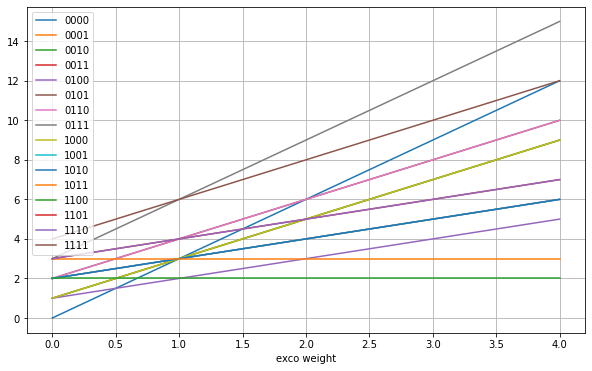

In [42]:
x, e, es, ue, lab = getSpectrum(CR, FR,mumax=4)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

# pl.figure(figsize=(10,6))
# for i in range(e.shape[0]):
#     pl.plot(x,es[i,:])
# pl.xlabel("exco weight")
# pl.grid()

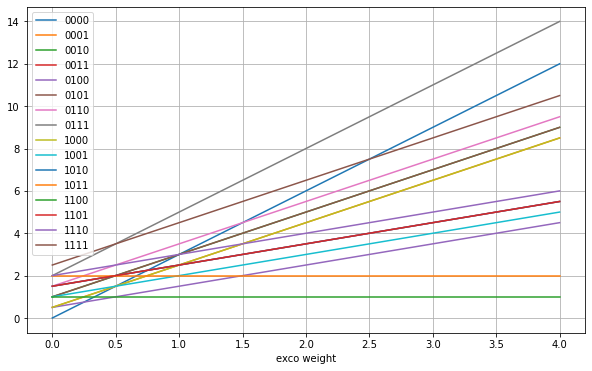

In [11]:
x, e, es, ue, lab = getSpectrum(CR, FR,mumax=4)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

# pl.figure(figsize=(10,6))
# for i in range(e.shape[0]):
#     pl.plot(x,es[i,:])
# pl.xlabel("exco weight")
# pl.grid()

In [12]:
def INTERP_init(params_prev_step):
    """
    Takes the optimal parameters at level p as input and returns the optimal inital guess for
    the optimal paramteres at level p+1. Uses the INTERP formula from the paper by Zhou et. al
    :param params_prev_step: optimal parameters at level p
    :return:
    """
    print("P=",params_prev_step)
    p = params_prev_step.shape[0]
    params_out_list = np.zeros(p+1)
    params_out_list[0] = params_prev_step[0]
    for i in range(2, p + 1):
        # Next line is clunky, but written this way to accommodate the 1-indexing in the paper
        params_out_list[i - 1] = (i - 1) / p * params_prev_step[i-2] + (p - i + 1) / p * params_prev_step[i-1]
    params_out_list[p] = params_prev_step[p-1]
    return params_out_list

Optimization terminated successfully.
         Current function value: 0.516114
         Iterations: 12
         Function evaluations: 25


(0.0, 1.0)

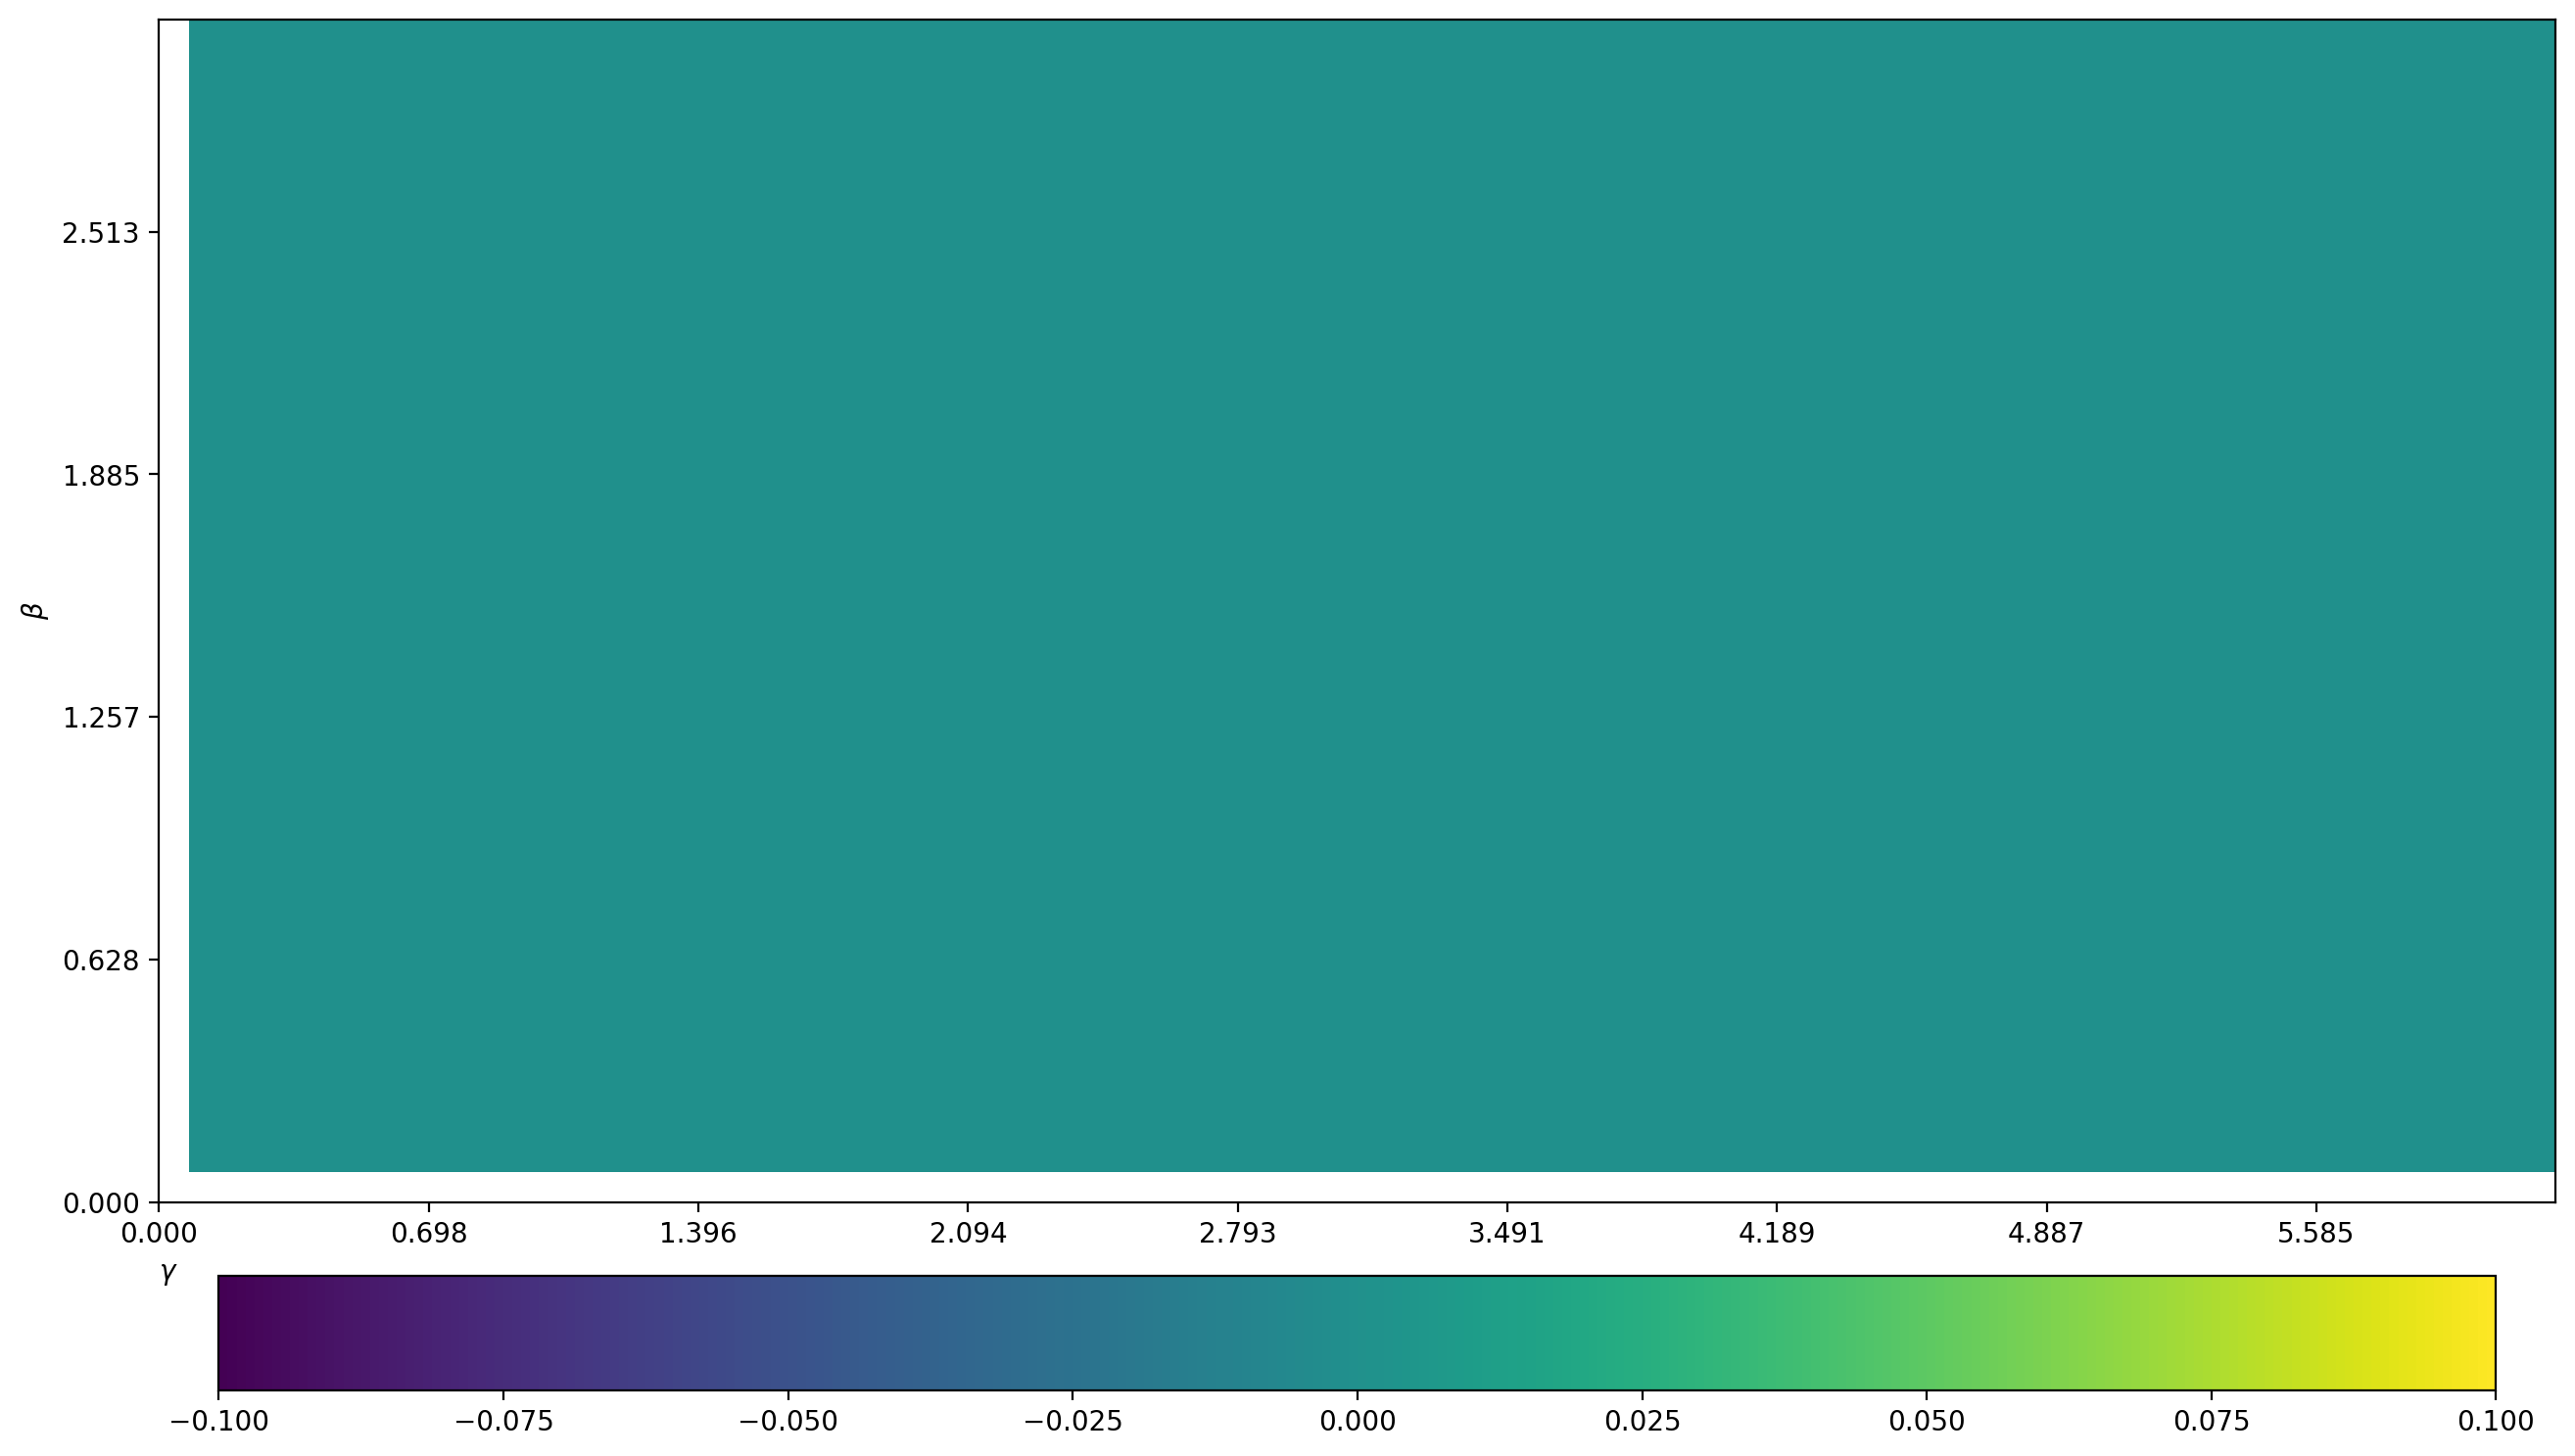

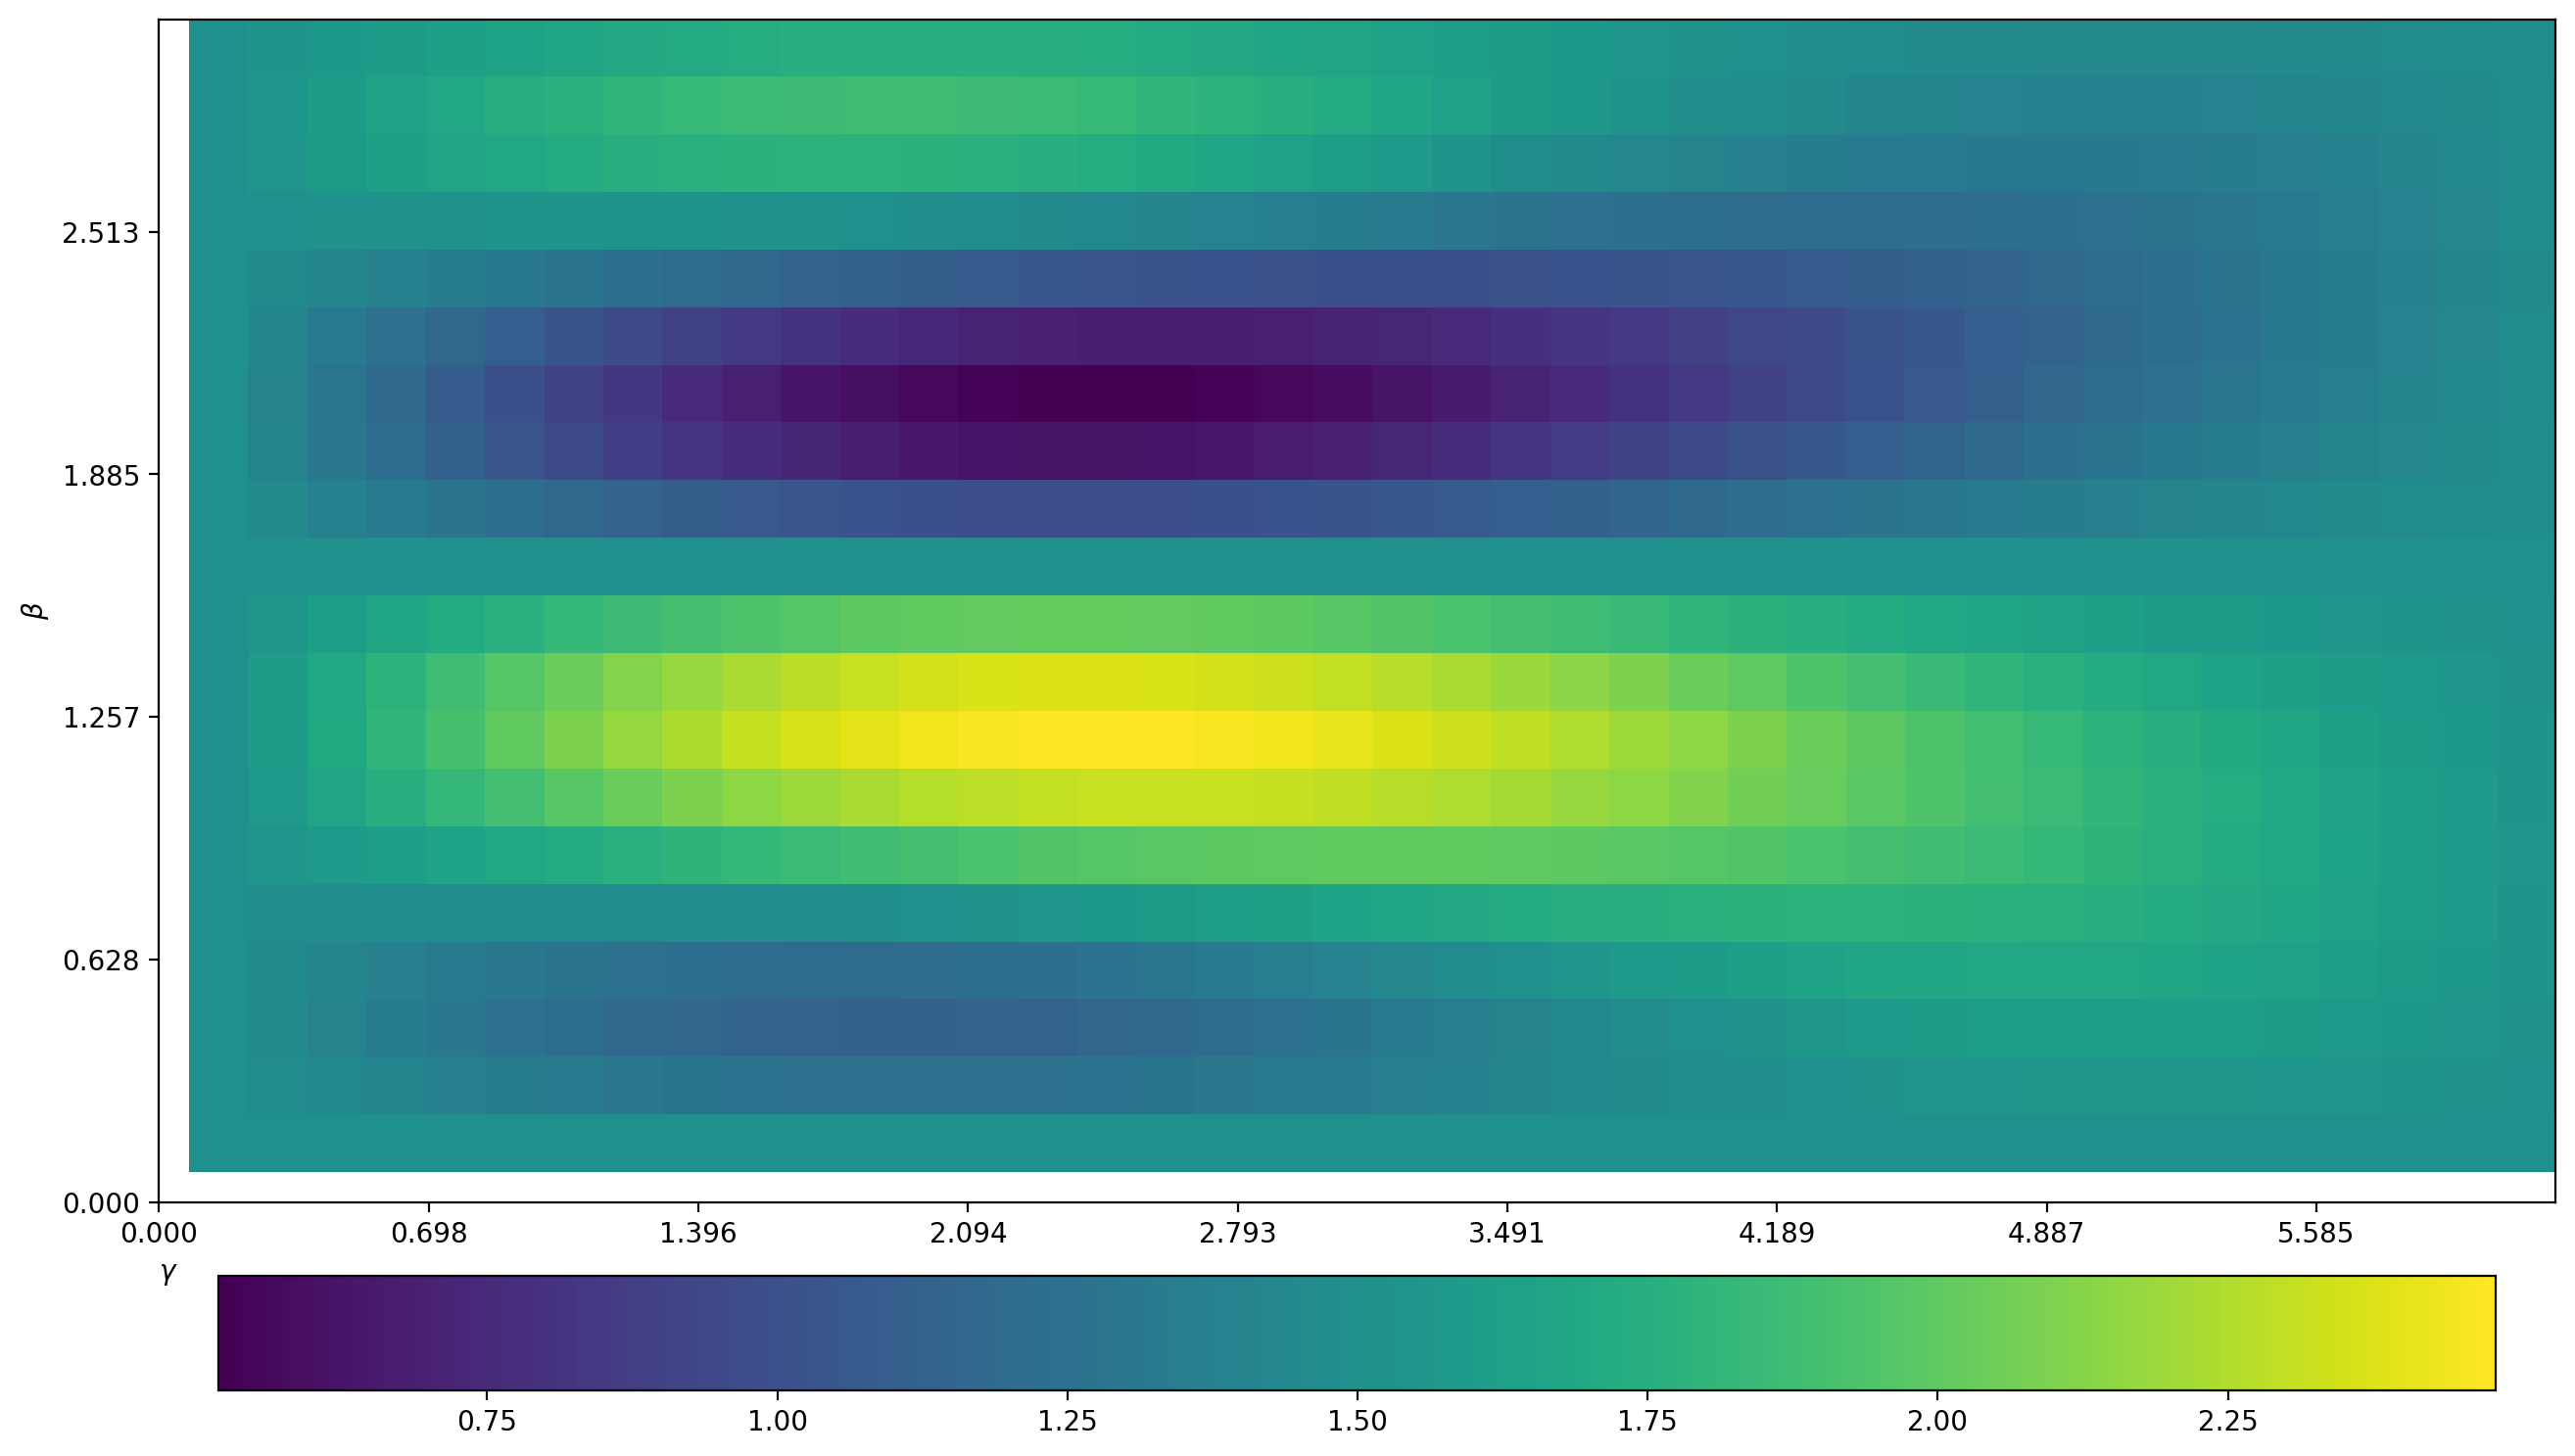

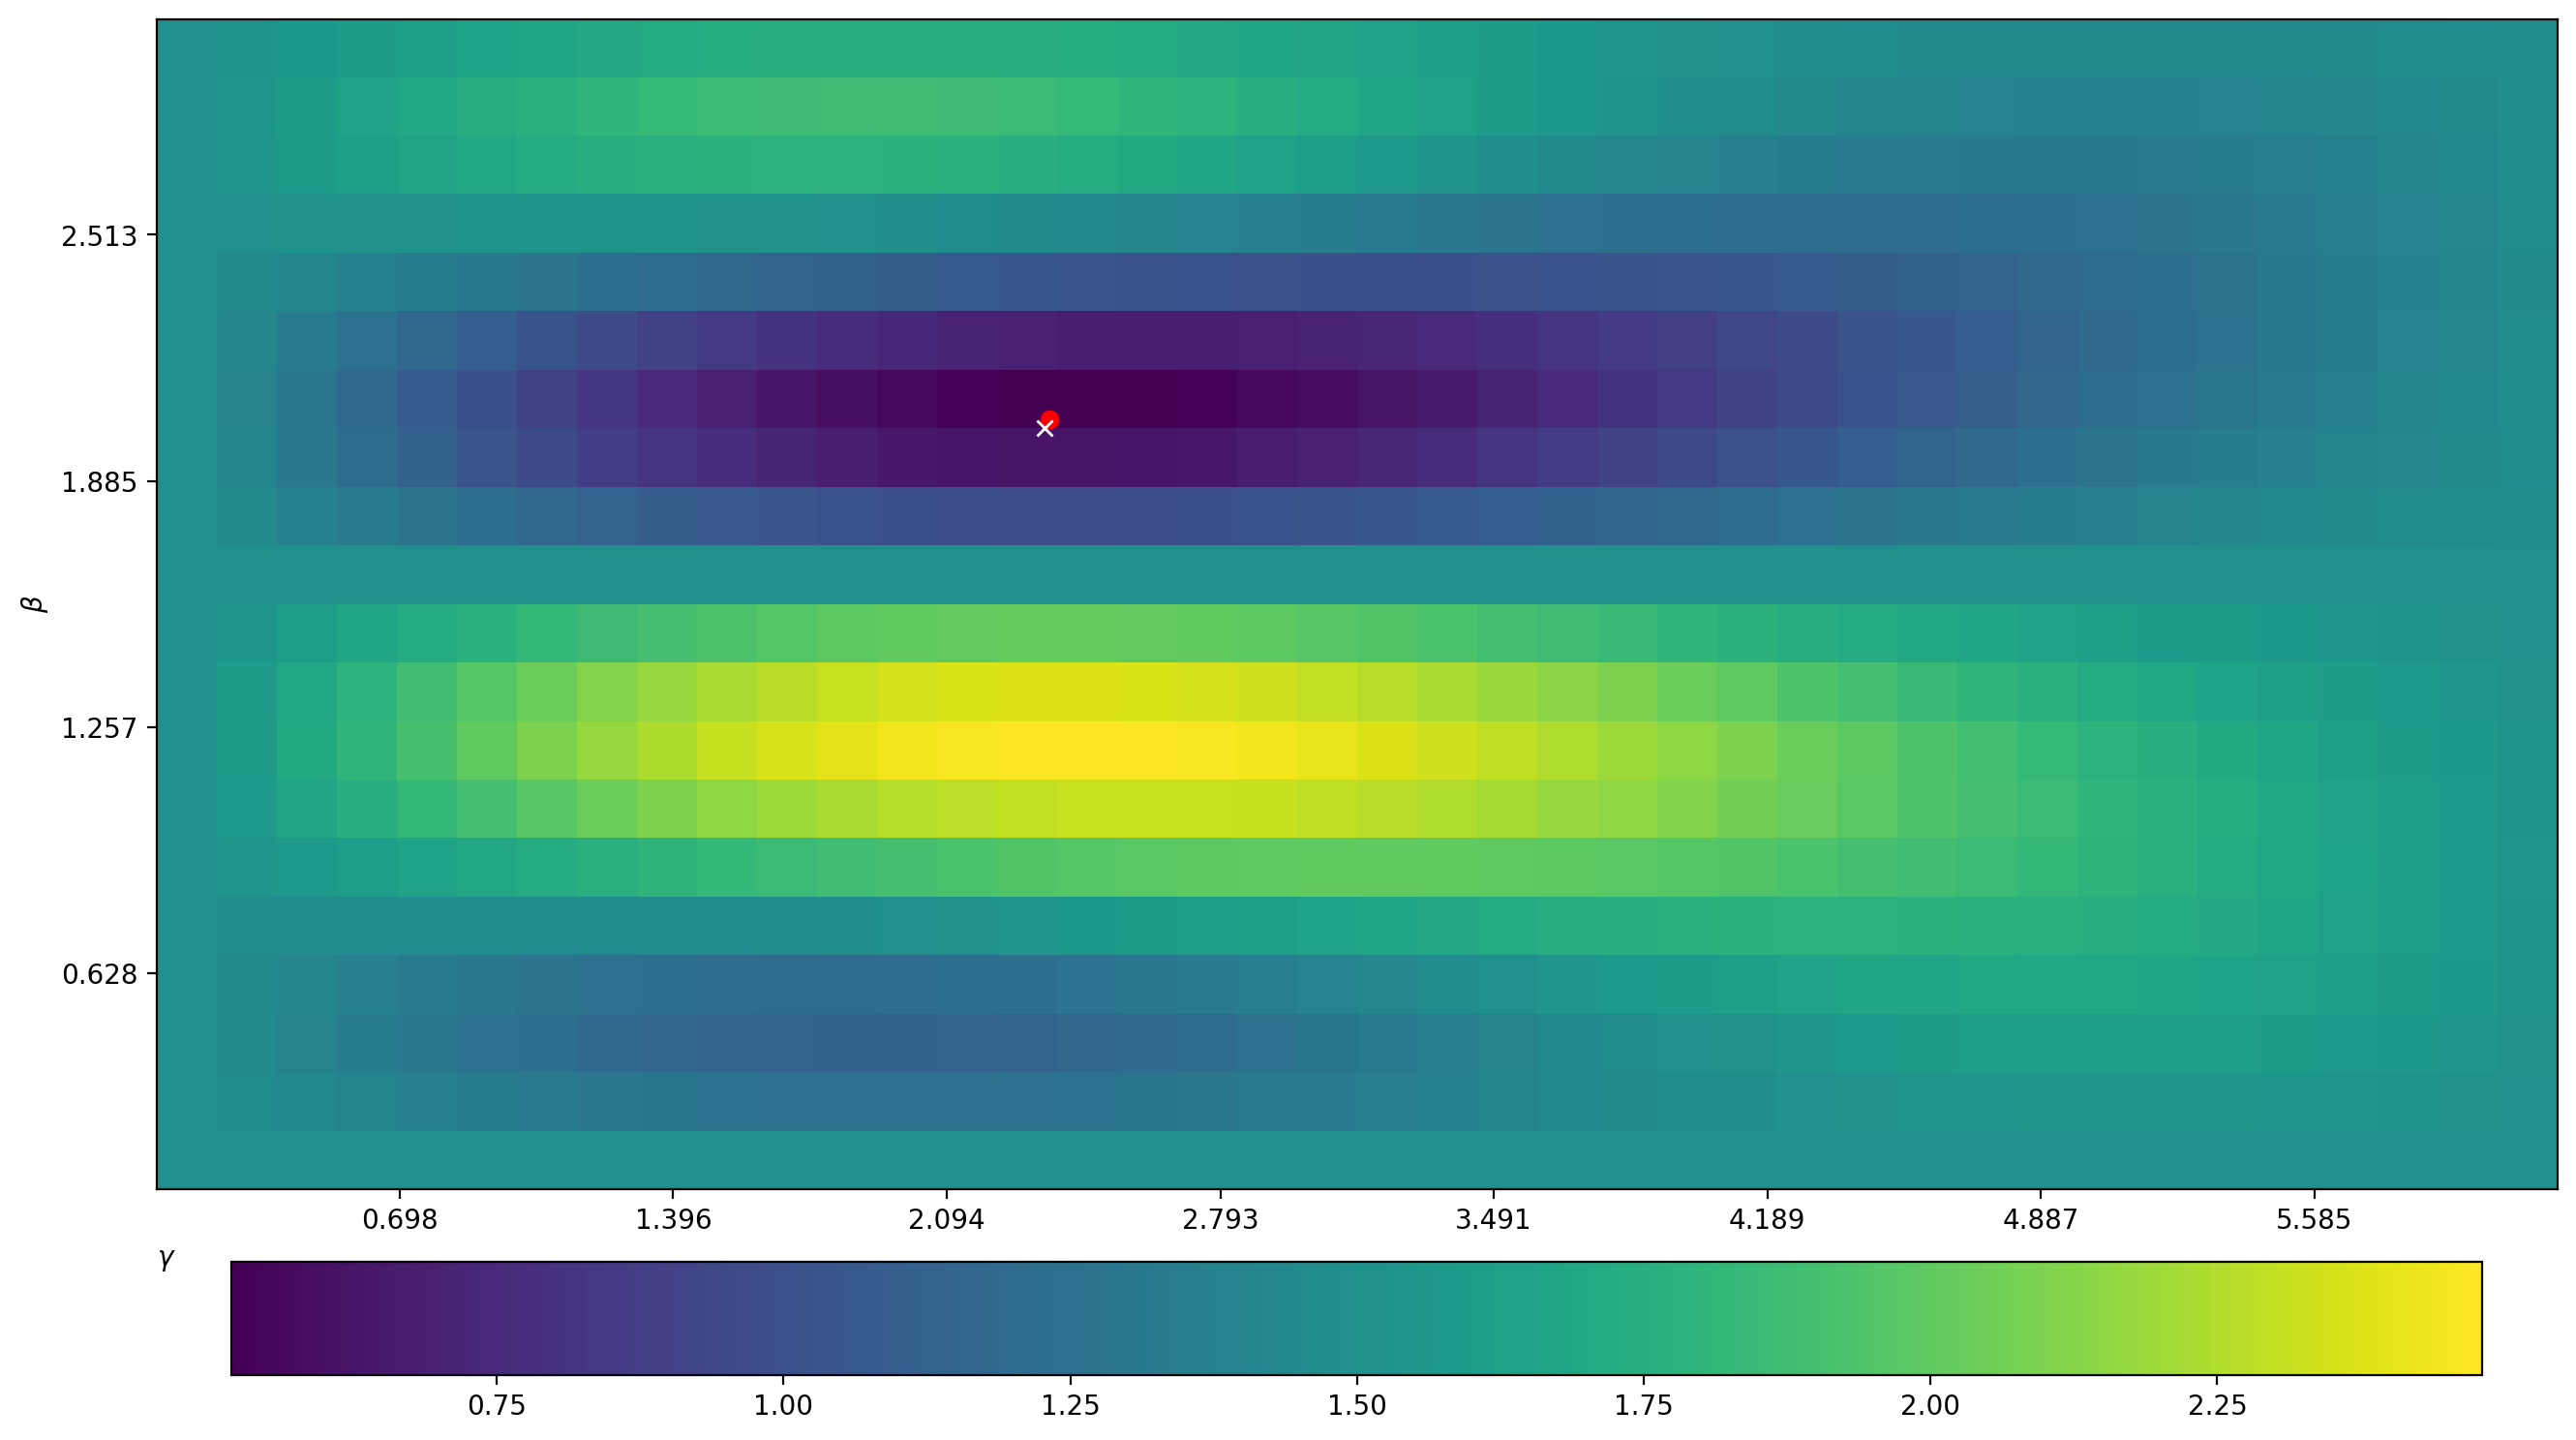

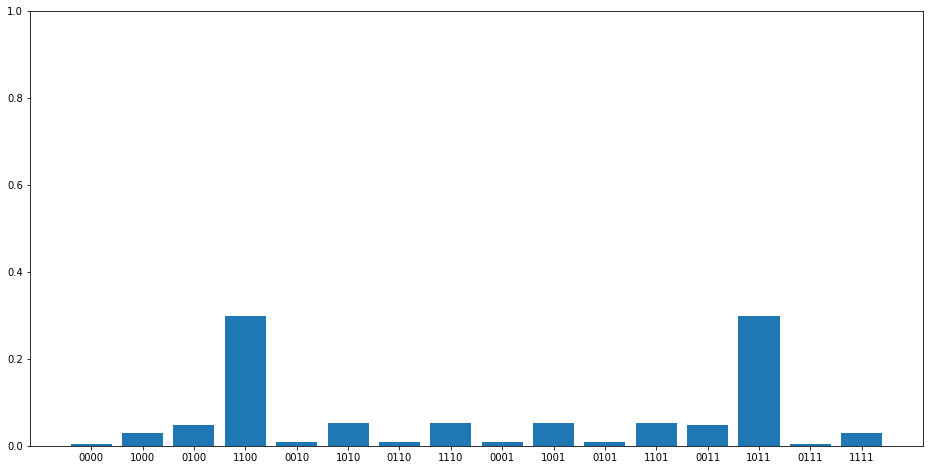

In [43]:
qaoa=QAOAChoose(None, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[True])
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[True])
        
# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')
        
# plot histogram
md=job_b.result().get_counts()
pl.figure(figsize=(16,8))
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

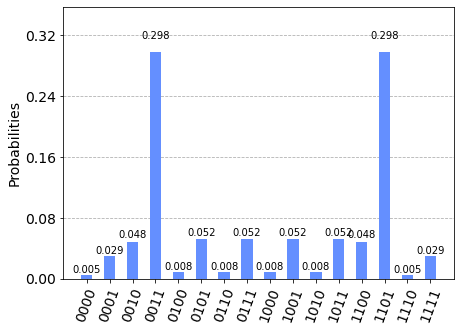

In [44]:
plot_histogram(job_b.result().get_counts())

In [45]:
depth=2
inter0 = INTERP_init(xb[::2])
inter1 = INTERP_init(xb[1::2])
xb_0 = np.zeros((2*depth))
xb_0[::2] = inter0
xb_0[1::2] = inter1
print(inter0)
print(inter1)

P= [2.34285919]
P= [2.02001283]
[2.34285919 2.34285919]
[2.02001283 2.02001283]


Optimization terminated successfully.
         Current function value: 0.000023
         Iterations: 132
         Function evaluations: 230


(0.0, 1.0)

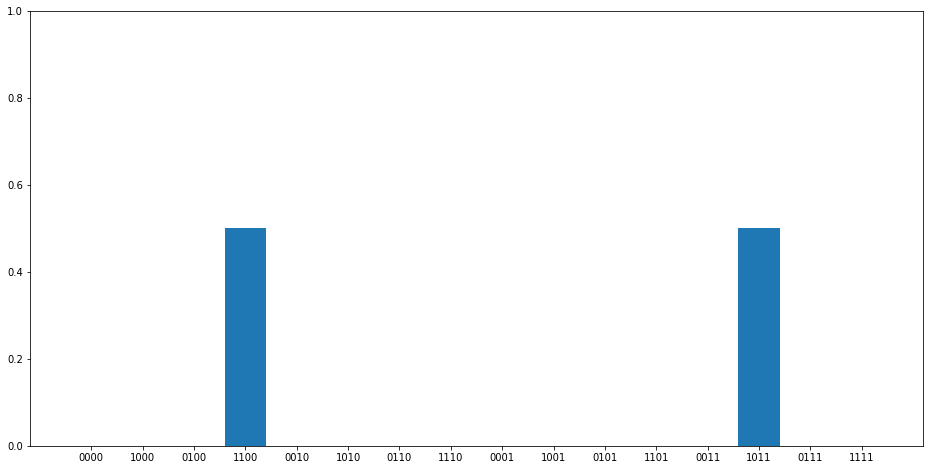

In [46]:
out2, job_b2, xb2 = qaoa.getlocalmin(xb_0, backend, mu,useExco=[True,True])
# plot histogram
md=job_b2.result().get_counts()
pl.figure(figsize=(16,8))
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

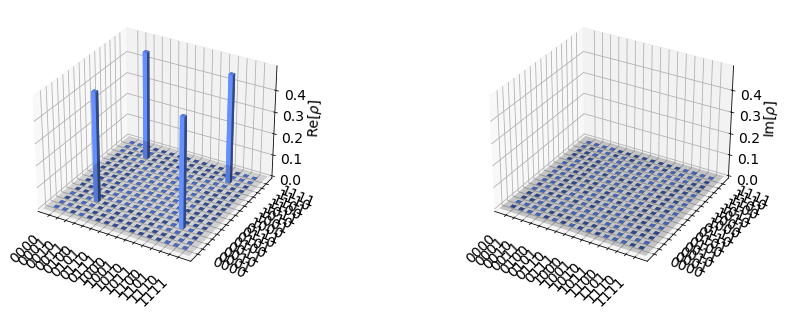

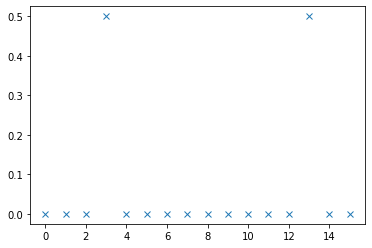

In [47]:
from qiskit.visualization import plot_state_city

sv=job_b2.result().results[0].data.statevector

pl.figure()
pl.plot(np.abs(sv)**2,'x')
# print(sv)
# sv=np.array((0,1,1.1,0), dtype=complex)
# sv/=np.linalg.norm(sv,2)

plot_state_city(sv)

Optimization terminated successfully.
         Current function value: 2.500017
         Iterations: 19
         Function evaluations: 37


(0.0, 1.0)

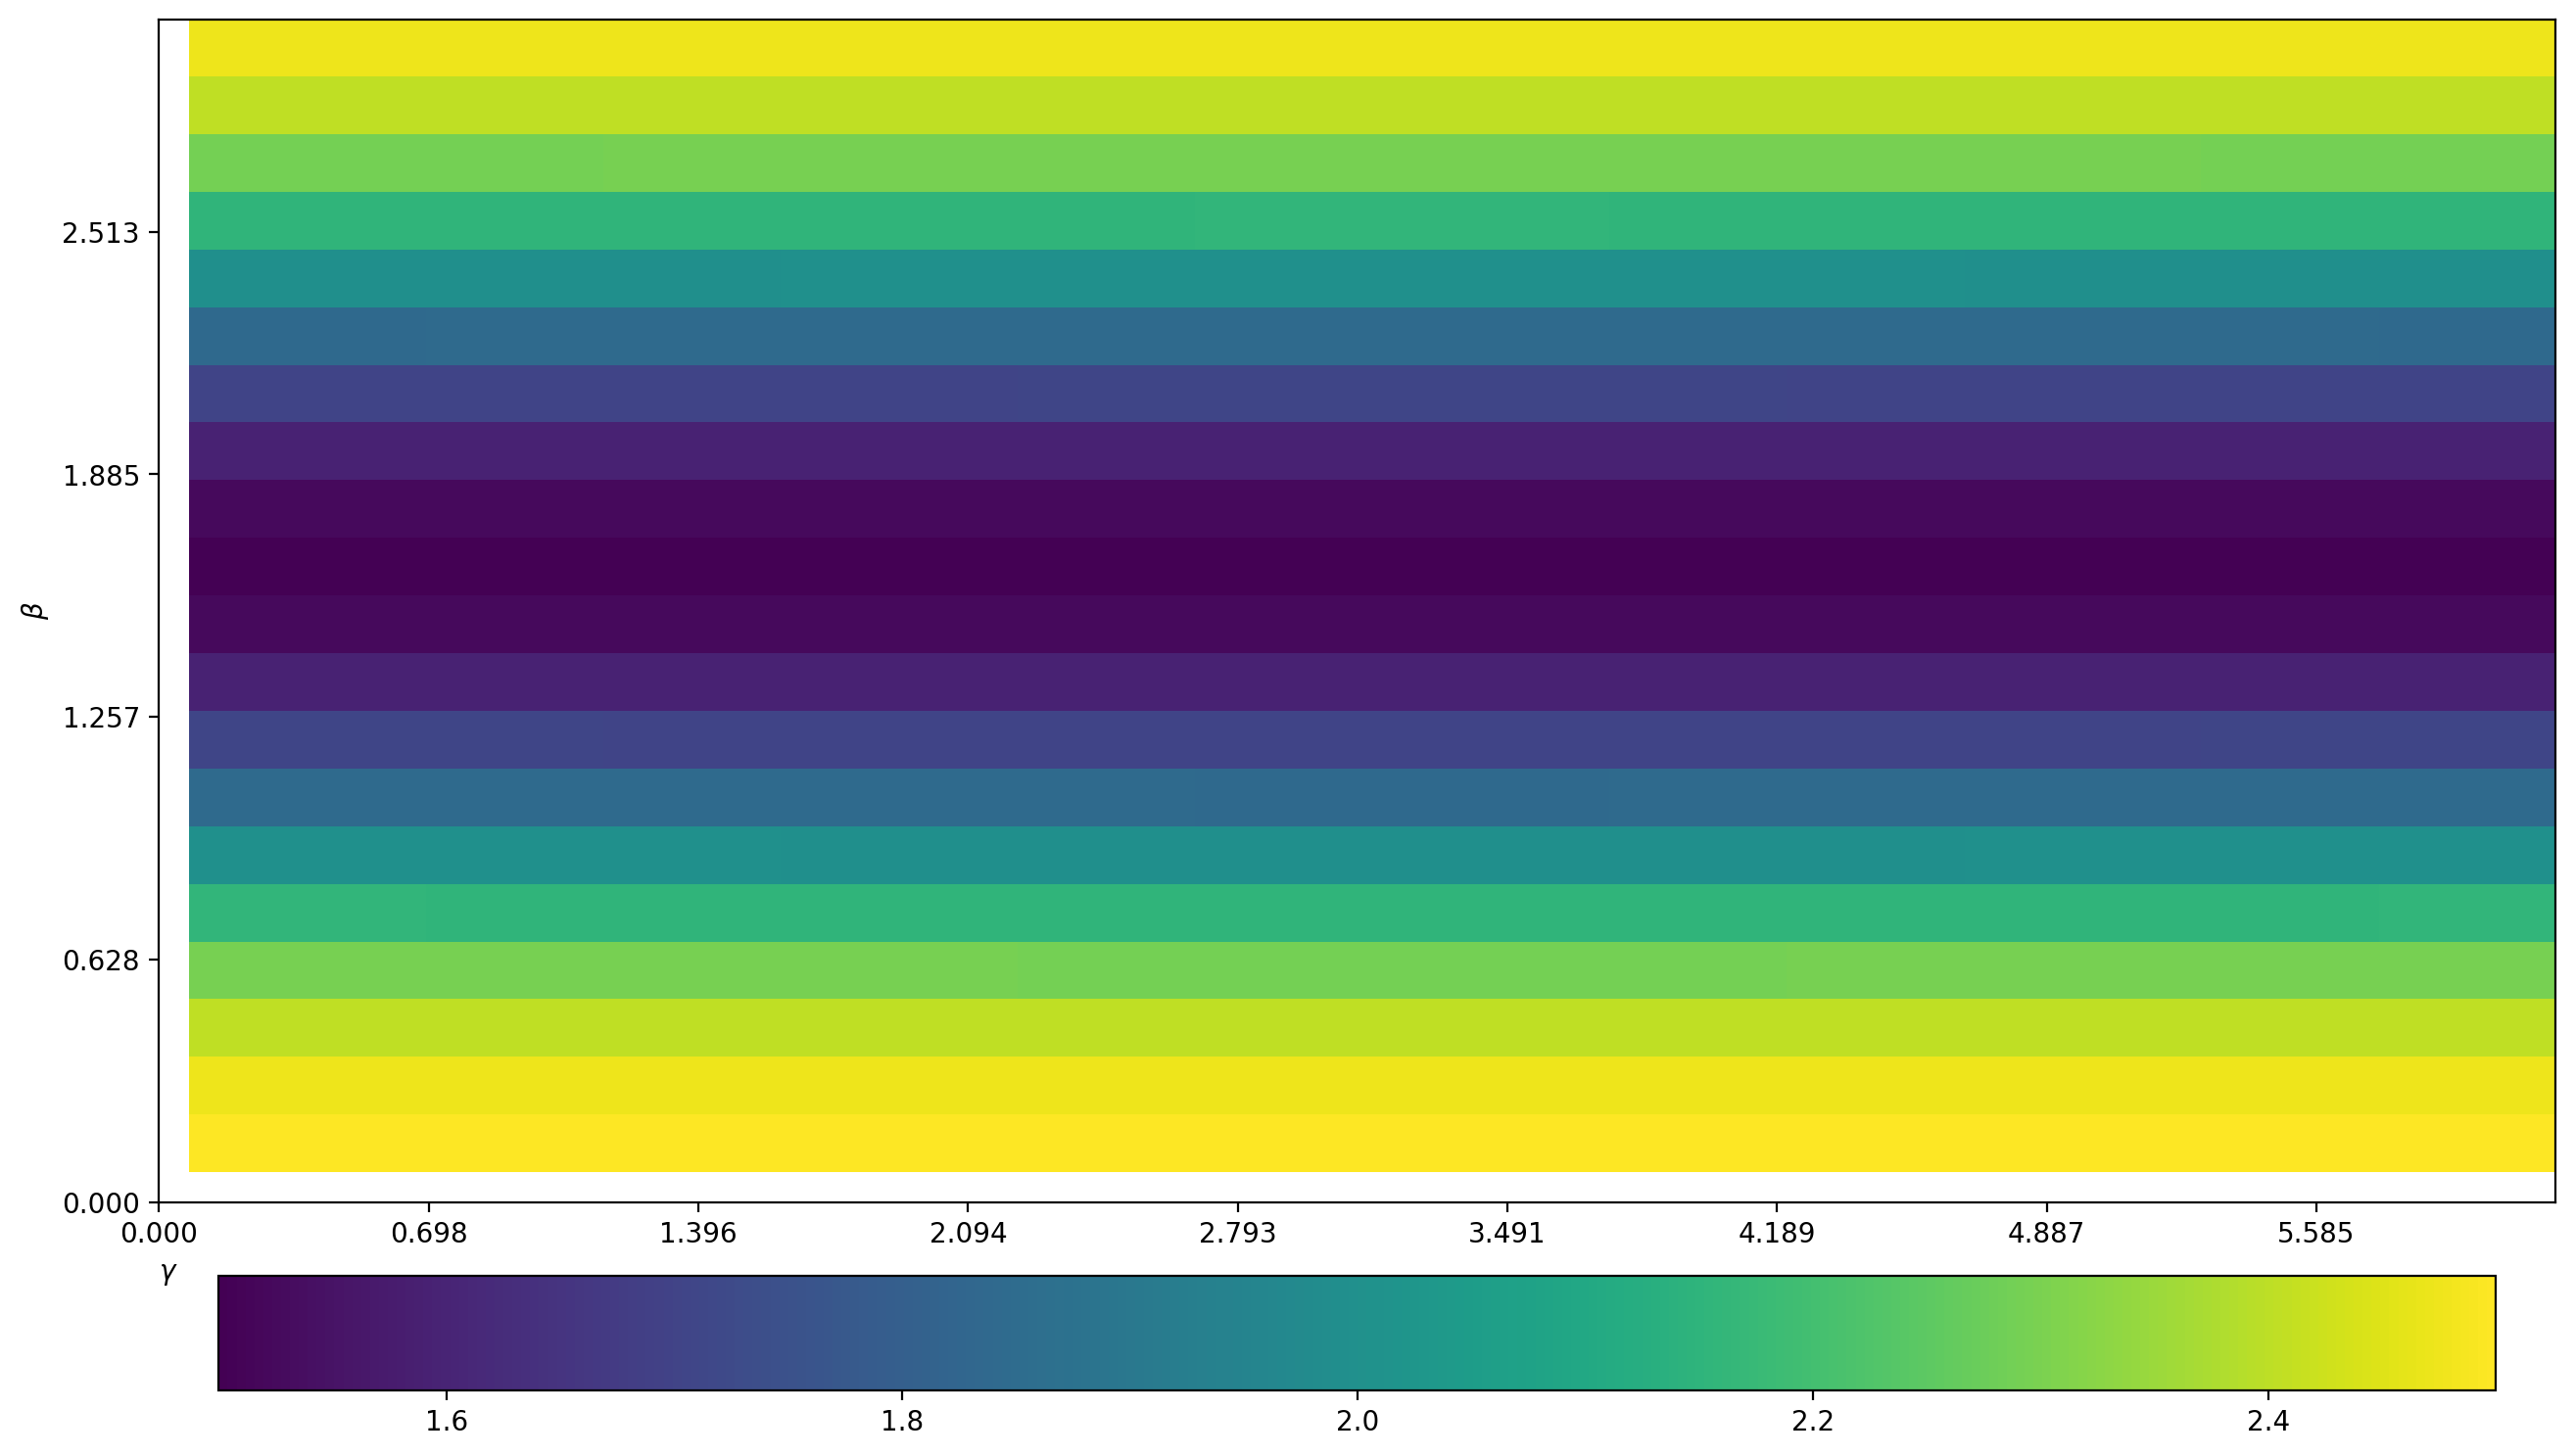

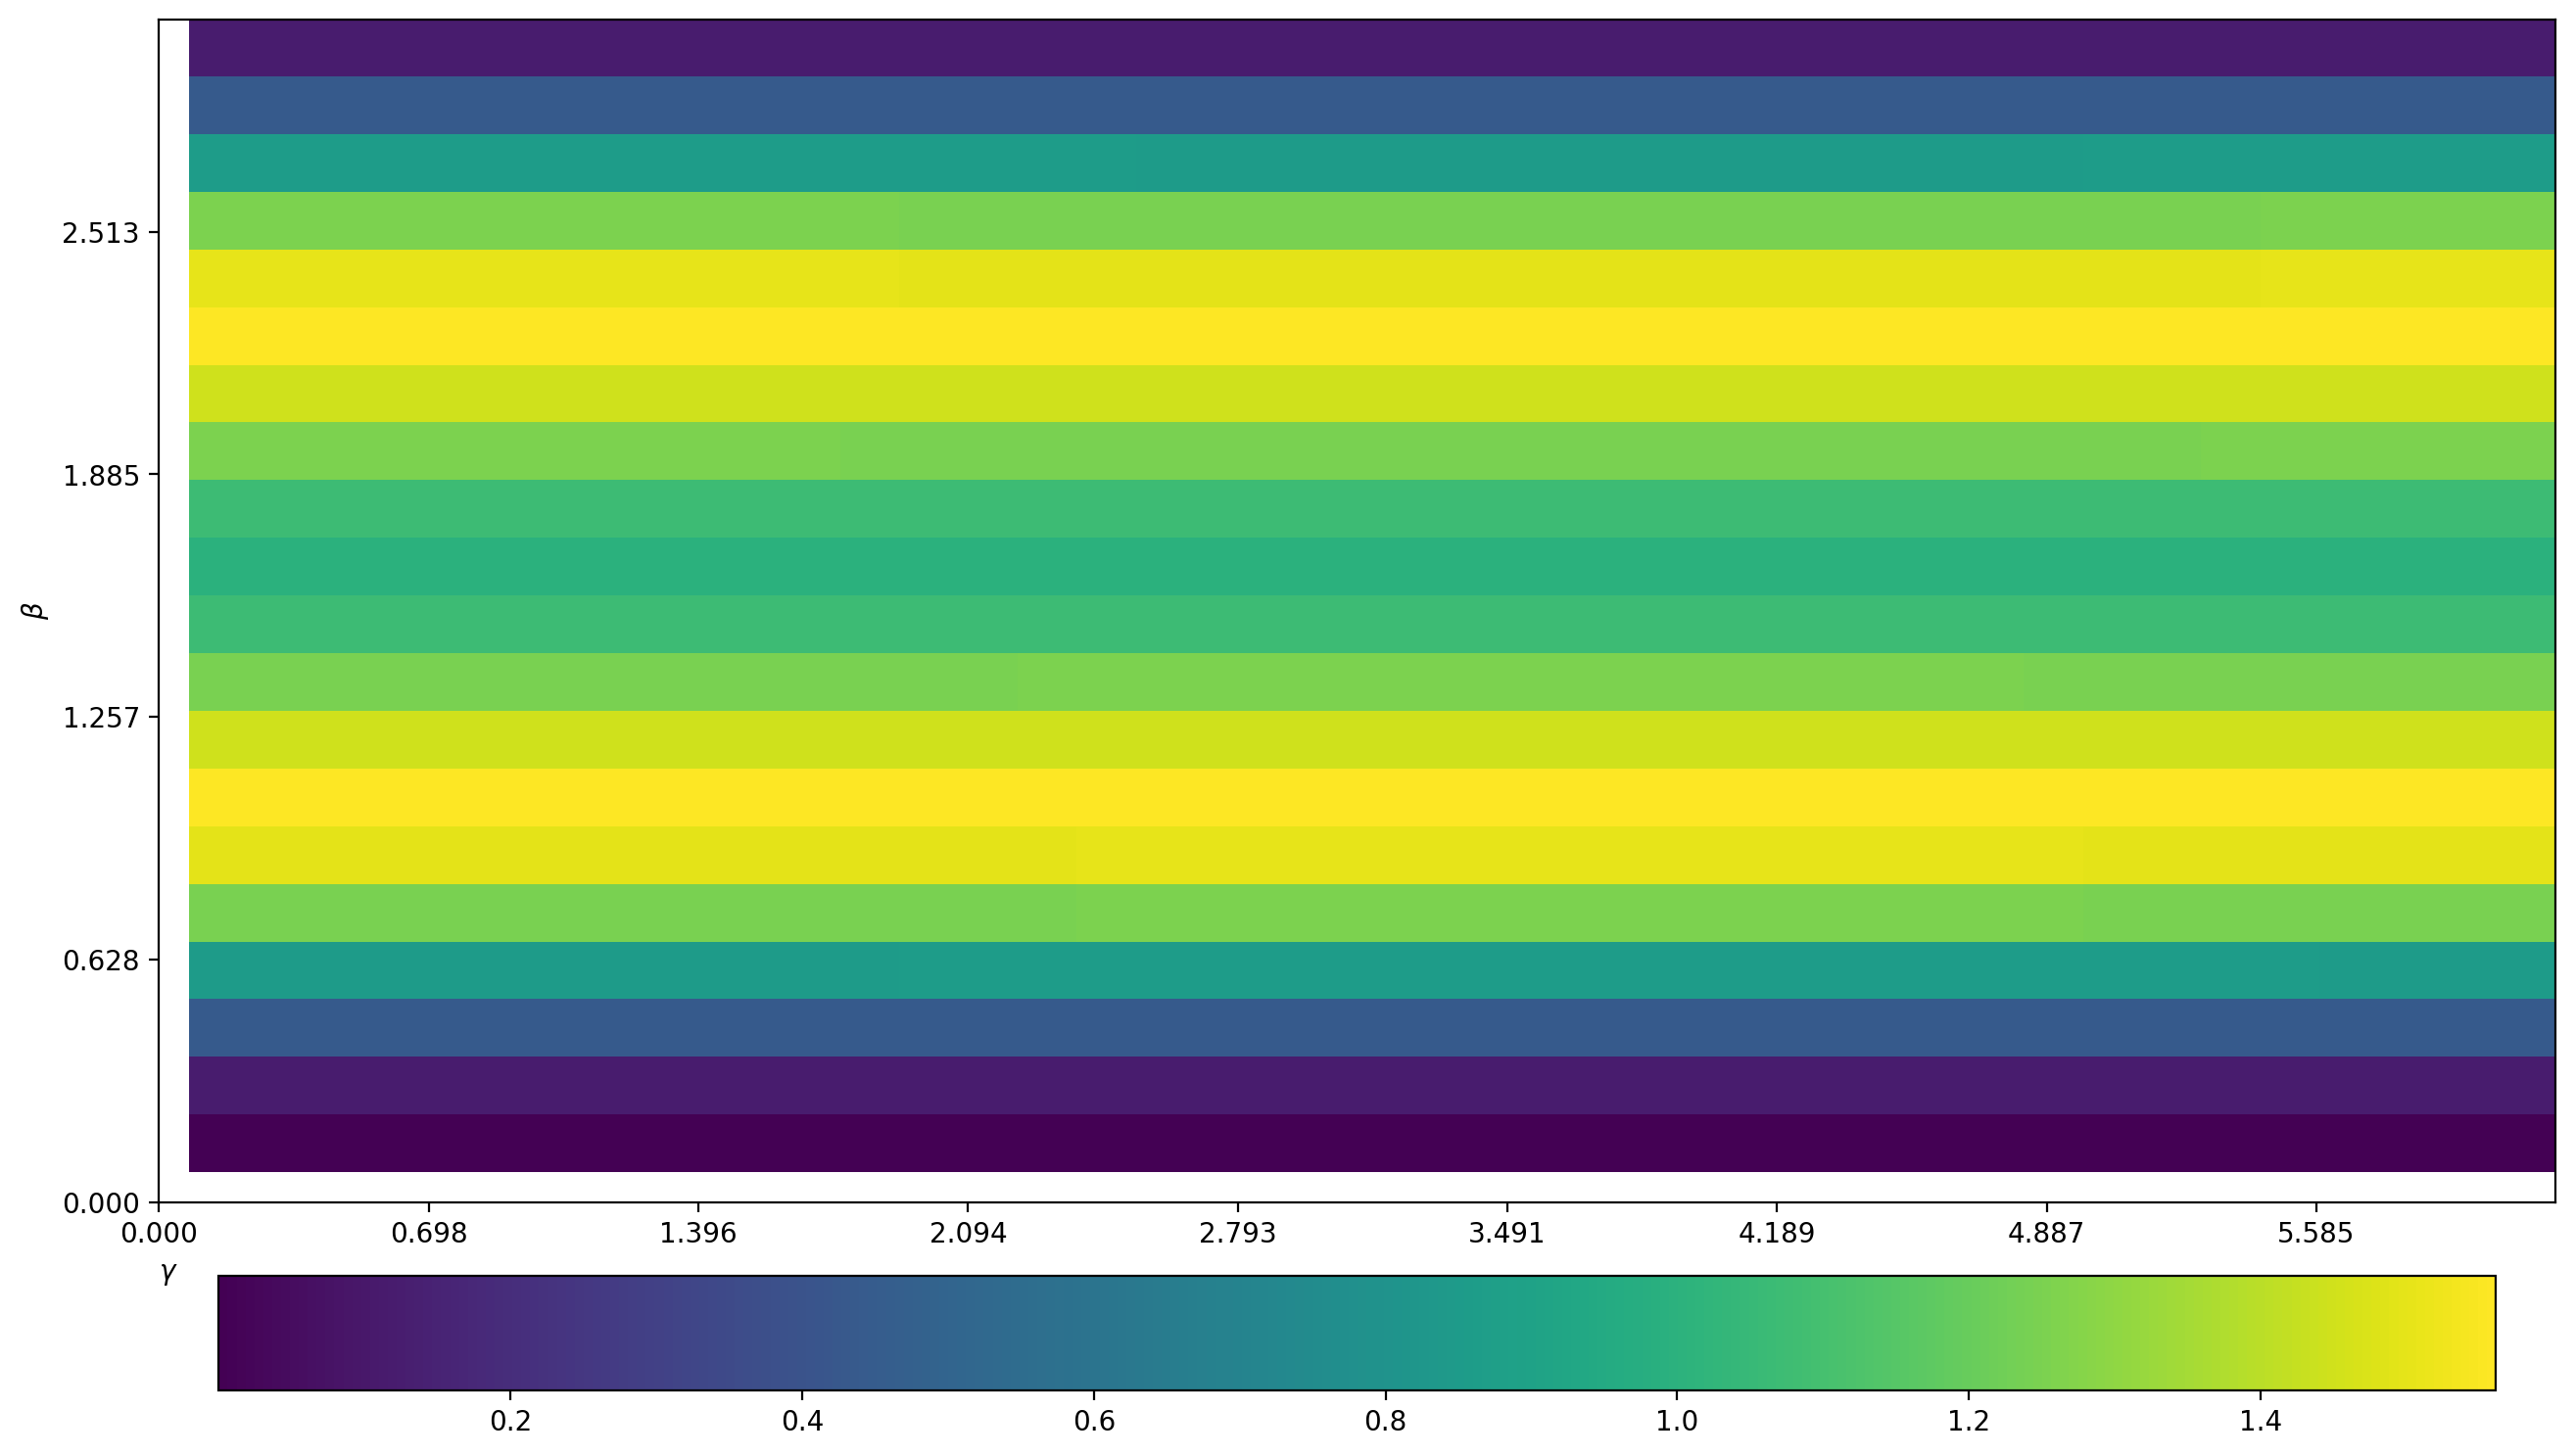

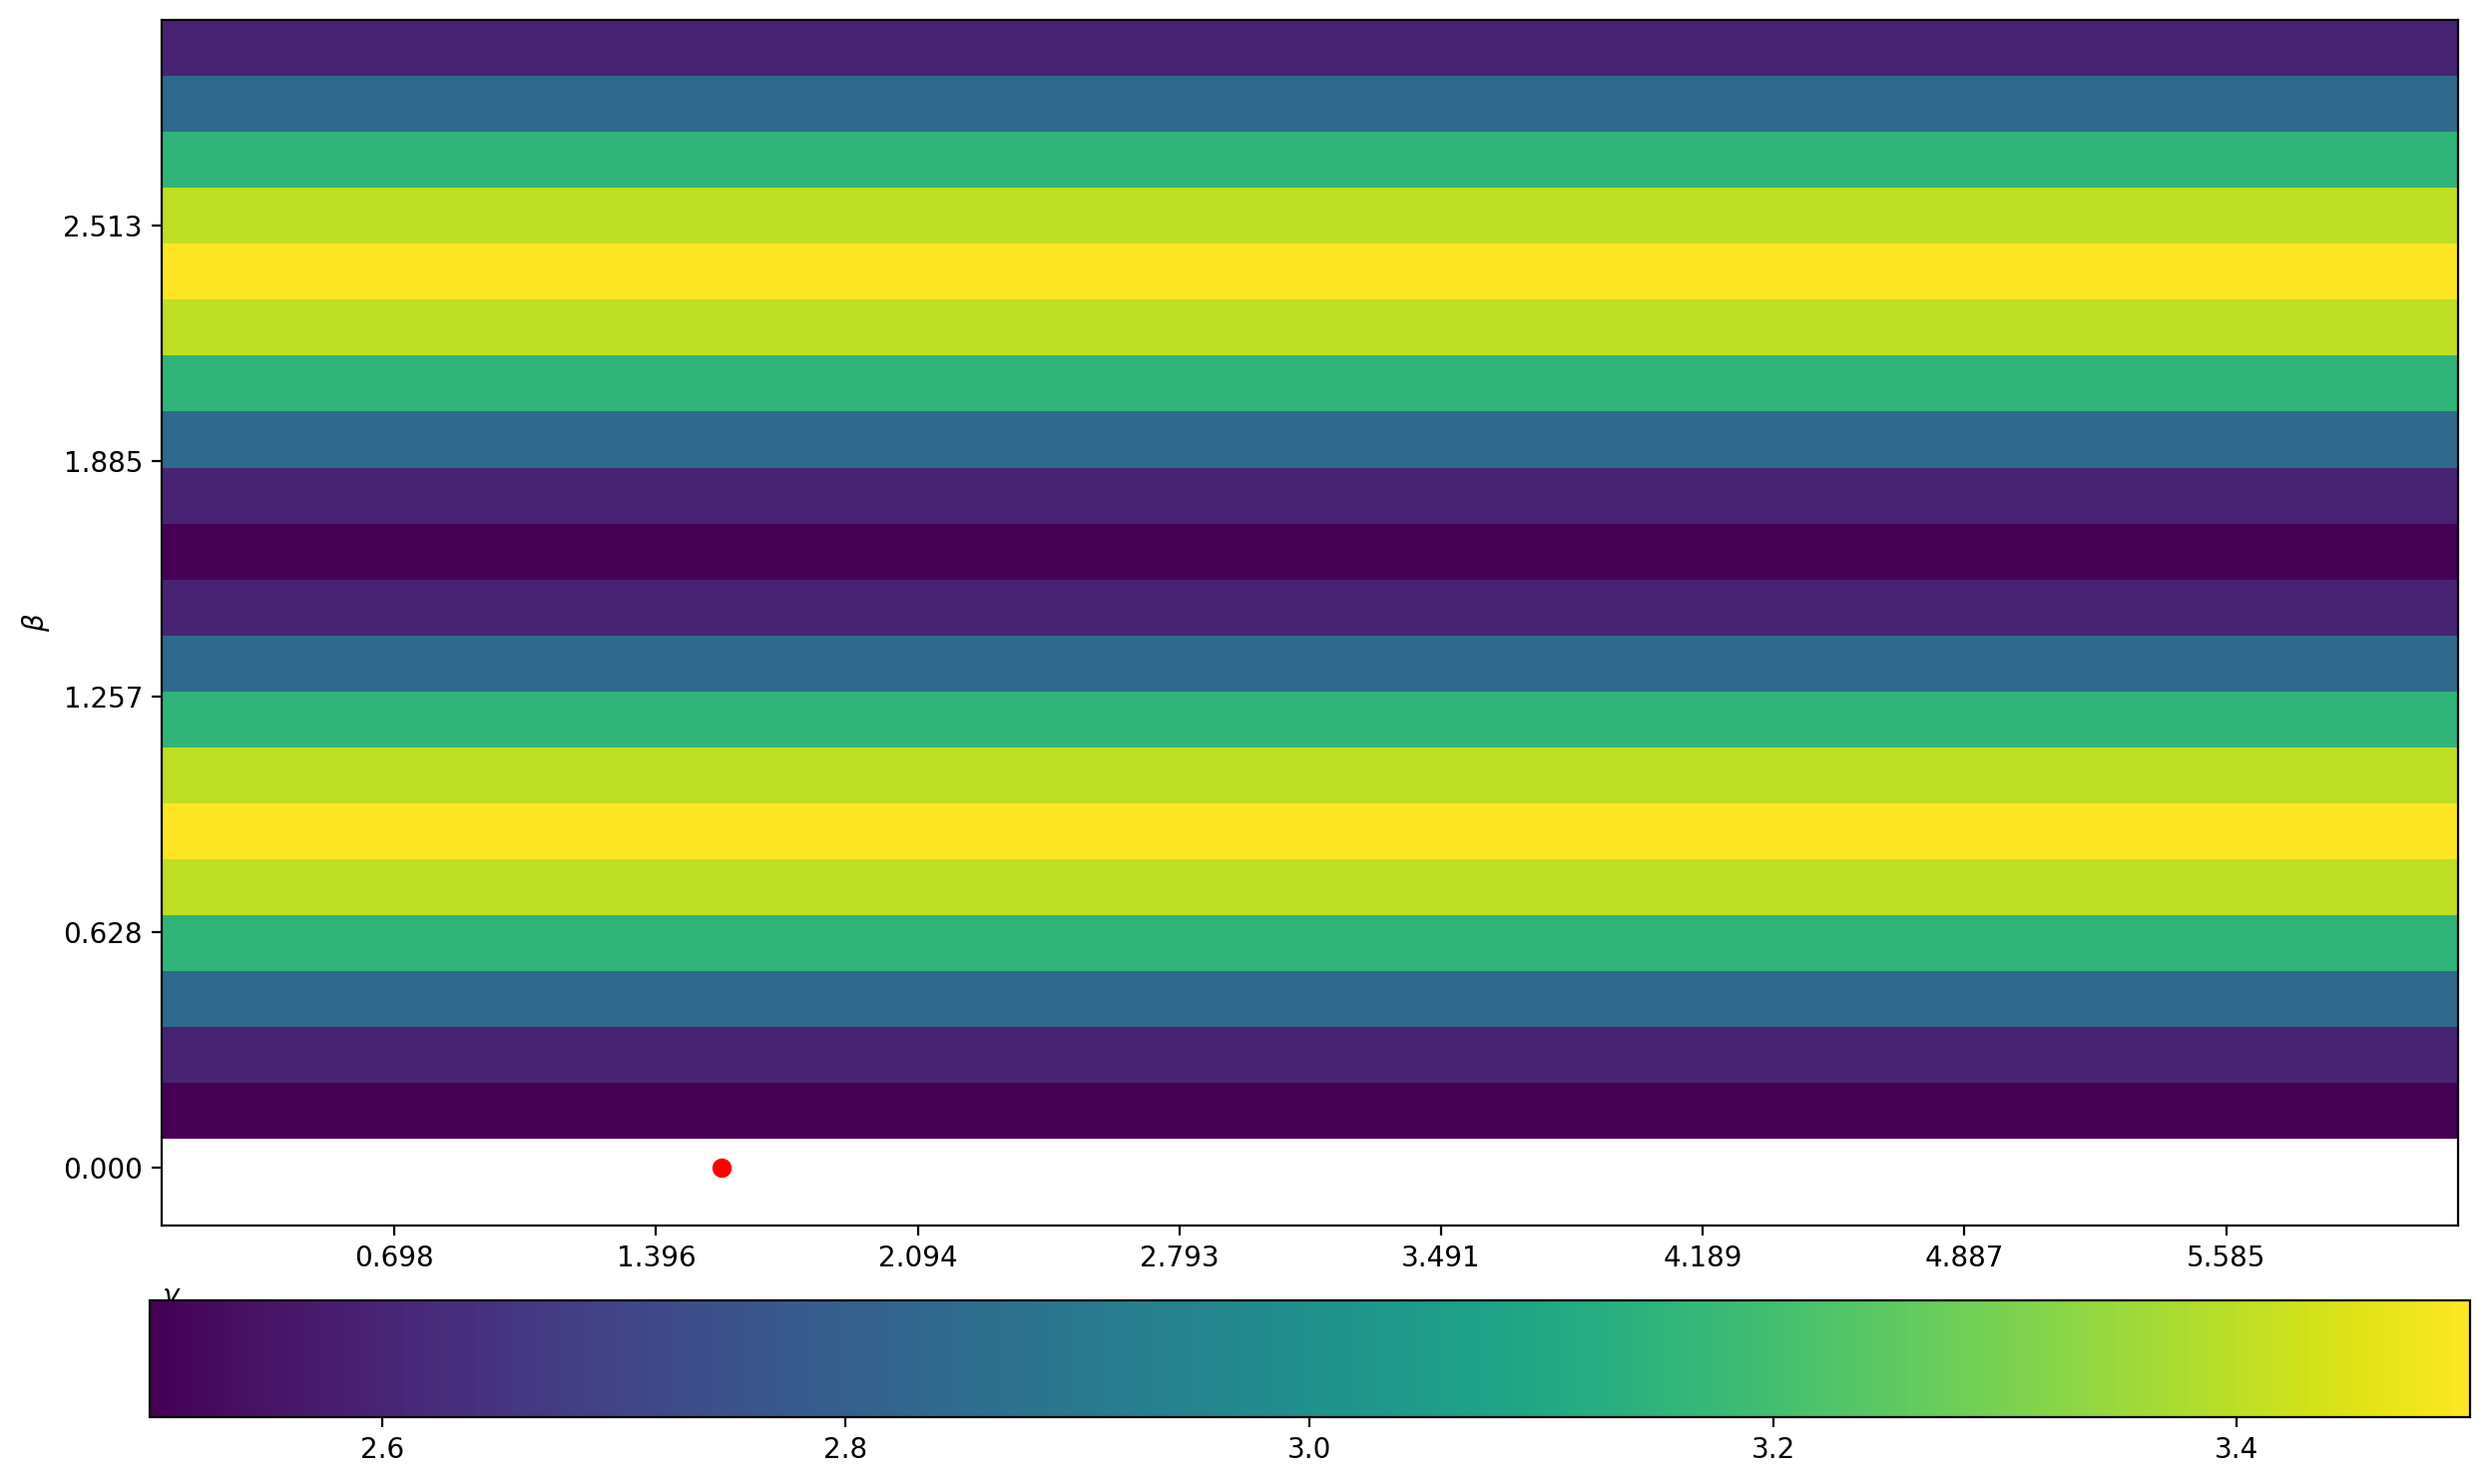

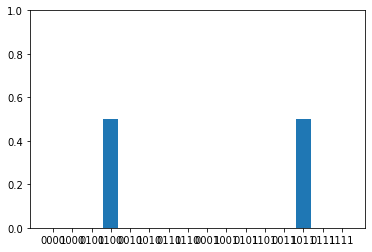

In [48]:
qaoa=QAOAChoose(CR, FR)

mu=1

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv)

# plot landscape
_=getfig(Ecost)
# plot landscape
_=getfig(Eexco)
# plot landscape
_=getfig(E)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])